<a href="https://colab.research.google.com/github/patriciamg90/F25-MAT-1630/blob/main/Mat_1630_10_6_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More on list comprehension and arrays
# Plots

This notebook introduces Python list comprehensions, NumPy arrays, and basic plotting with `matplotlib`.  
Exercises include both coding practice and conceptual questions.  


## Learning Objectives
- Write and read Python **list comprehensions** for sequence generation and transformation.
- Create and manipulate **NumPy arrays** for vectorized computation.
- Understand broadcasting and common array methods (`cumsum`, `reshape`, `stack`, indexing).
- Make simple **plots** with `matplotlib` (line, scatter, histogram).

## Setup
Run the following cell to import packages.  
We will use `numpy` and `matplotlib` throughout.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Make plots appear inline and a bit larger by default
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,4)


## 1. List Comprehensions

A **list comprehension** builds a new list from an iterable in compact form:

$$
\text{new}_\text{list} = [\, \phi(x) \text{ for } x \in \mathcal{S} \text{ if condition(x)} \,]
$$


In [3]:
# Squares of the first five nonnegative integers
squares = [k**2 for k in range(5)]
squares


[0, 1, 4, 9, 16]

In [4]:
# Filter and transform: cubes of even numbers below 10
even_cubes = [n**3 for n in range(10) if n % 2 == 0]
even_cubes


[0, 8, 64, 216, 512]

### Exercise 0.60 (Homework)

Using a list comprehension **or** a NumPy array, create the sequence  

$$
f(n) = 4n^3 - 1 \quad \text{for} \quad n = 0,1,2,\dots,6.
$$

- **List comprehension approach**  
- **NumPy approach** using `np.arange` and vectorized operations  

<details><summary><strong>Hint</strong></summary>

- For lists: `range(7)` iterates over \( n = 0,$\dots$,6 \).  
- For NumPy: `x = np.arange(7)` gives the same values as an array and supports operations like `4*x**3 - 1`.
</details>

<details><summary><strong>Solution</strong> (click to reveal)</summary>

```python
# List comprehension
f_list = [4*n**3 - 1 for n in range(7)]
f_list

# NumPy vectorized
x = np.arange(7)
4*x**3 - 1


### Exercise 0.61

Use a list comprehension to generate the set of all ordered pairs  

$$
S = \{(m,n) \mid m,n \in \mathbb{Z}, 0 \le m,n \le 3\}.
$$

What is |S|?

**Instruction:**  
Use a nested comprehension:
$$
[(m,n) \text{ for } m \text{ in } \{0,\dots,3\} \text{ for } n \text{ in } \{0,\dots,3\}]
$$

<details><summary><strong>Solution</strong> (click to reveal)</summary>

```python
S = [(m, n) for m in range(4) for n in range(4)]
print(S)
len(S)  # should be 16


## 2. NumPy Arrays and Vectorization

A function written for a single number often works **elementwise** on arrays when you use  
NumPy operations (like `+`, `-`, `*`, `**`) and NumPy math (`np.sin`, `np.exp`, etc.).


Consider the functions:
$$
g(x) = x^2 - 3x + 1, \qquad f(x) = \cos(x)\, e^{-x/2}.
$$

If we implement them using NumPy operations, they will accept either scalars or arrays.


In [7]:
from numpy import cos, exp

def g(x):
    return x**2 - 3*x + 1

def f(x):
    return cos(x) * exp(-x/2)

# Scalar input (float)
x_scalar = 1.2
y_scalar = f(x_scalar)
z_scalar = g(x_scalar)

x_scalar, y_scalar, z_scalar


(1.2, np.float64(0.19886615208570077), -1.1599999999999997)

In [8]:
# Array input
x = np.linspace(0, 3, 11)   # 11 points from 0 to 3
y = f(x)
z = g(x)

print("x =", x)
print("f(x) =", y)
print("g(x) =", z)


x = [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3. ]
f(x) = [ 1.          0.82226574  0.61142366  0.39635602  0.19886615  0.03341389
 -0.09237348 -0.17666471 -0.22209872 -0.2343719  -0.22089718]
g(x) = [ 1.    0.19 -0.44 -0.89 -1.16 -1.25 -1.16 -0.89 -0.44  0.19  1.  ]


### Exercise 0.62 — Practice with NumPy arrays

1. Create a list \( L = [2,4,6,8,10] \) and convert it to a NumPy array `a`.  
2. Compute `a**2`, `a.cumsum()`, and `np.sin(a)`.  
3. Create an equally spaced array on \([0,1]\) with 9 points using `np.linspace`.  
4. Build a \(3$\times$ 3\) matrix  

$$
M = \begin{bmatrix}
1 & 2 & 3 \\
0 & 0 & 0 \\
7 & 5 & 4
\end{bmatrix}
$$

and do:  
   - `M[0,1]` (first row, second column)  
   - `M[:,2]` (third column)  
   - `M[:1,:]` (first row as a 2D slice)  

5. Stack arrays vertically and horizontally:  
   `np.stack((a, a**2))` and `np.hstack((a, a**2))`.

<details><summary><strong>Solution</strong> (click to reveal)</summary>

```python
import numpy as np

L = [2,4,6,8,10]
a = np.array(L)

a**2
a.cumsum()
np.sin(a)

np.linspace(0, 1, 9)

M = np.array([[1,2,3],
              [0,0,0],
              [7,5,4]])
M[0,1]
M[:,2]
M[:1,:]

np.stack((a, a**2))
np.hstack((a, a**2))


## 3. Plotting with Matplotlib

We'll create simple line, scatter, and histogram plots.


### Example: Plot $$ f(x) = \cos(x)e^{-x/2}  \text{ on } [0, 6]$$


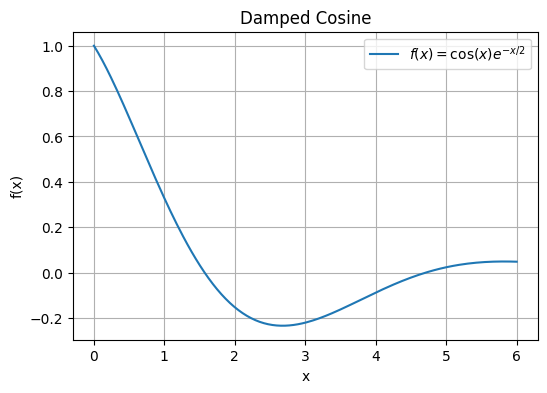

In [9]:
x = np.linspace(0, 6, 200)
y = f(x)

plt.figure()
plt.plot(x, y, label=r"$f(x)=\cos(x)e^{-x/2}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Damped Cosine")
plt.legend()
plt.grid(True)
plt.show()


### Example: Discrete points from a list comprehension

Let $$
h(n) = 4n^3 - 1
$$ for $n=0,\dots,6$. We'll plot the points as a scatter.


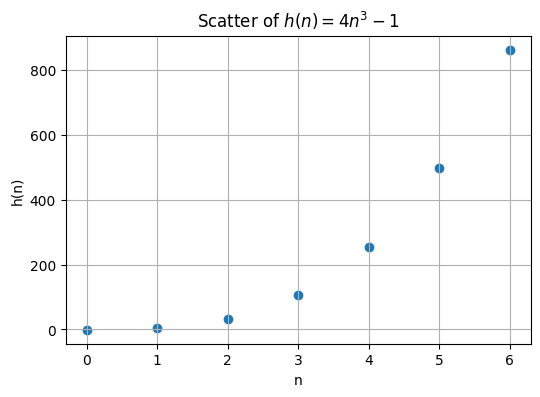

In [10]:
n = np.arange(7)
h = 4*n**3 - 1

plt.figure()
plt.scatter(n, h)
plt.xlabel("n")
plt.ylabel("h(n)")
plt.title("Scatter of $h(n) = 4n^3 - 1$")
plt.grid(True)
plt.show()


### Example: Histogram

Draw 1000 samples from a normal distribution and plot a histogram.


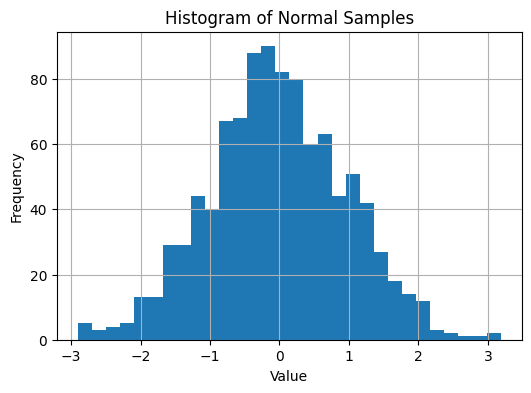

In [11]:
rng = np.random.default_rng(1630)
samples = rng.normal(loc=0.0, scale=1.0, size=1000)

plt.figure()
plt.hist(samples, bins=30)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Normal Samples")
plt.grid(True)
plt.show()


## Tips for Students
- Prefer NumPy operations over Python loops for array math — it's shorter **and** faster.  
- Use `np.linspace` to sample functions over an interval for plotting.  
- When you need math functions (`sin`, `cos`, `exp`, `sqrt`), import them from **NumPy** (not from `math`) so they work on arrays.  


## Summary and Homework

#### Quick Review Questions
Answer these short questions in text or code cells below each one.

1. What is the main difference between a **Python list** and a **NumPy array**?  
2. When using math functions like `sin`, `cos`, or `exp`, why should we prefer importing them from **NumPy** instead of `math`?  
3. Explain what this line of code produces:
   ```python
   [(m, n) for m in range(3) for n in range(2)]


4. What is vectorization and why is it useful for numerical computing?

5. What does the following code return?

```python
np.linspace(0, 10, 6)



## 🧮 Homework — Submission Practice

Answer these exercises in the following empty code cells.  
Show your work clearly and add comments explaining each step.  
You may submit your completed Colab notebook on your class repository or LMS.

---

### **Exercise H1 — List Comprehension**

Write a list comprehension that builds

$$
h(n) = 2n^2 - 5n + 3 \quad \text{for } n = 0,1,\dots,9
$$

Then:
- Print the list.
- Print its **length** using the `len()` function.

---

### **Exercise H2 — NumPy Array and Plotting**

Using **NumPy**, create an array \( \texttt{x} \) of 50 points from \( 0 \) to \( 4\pi \).

Compute

$$
y = \sin(x) + \tfrac{1}{2}\cos(2x)
$$

Then plot both \( \sin(x) \) and \( y \) on the same graph, adding:
- Axis labels (`x`, `y`)
- A title
- A legend showing both curves.

*Hint:* Use  
```python
plt.plot(x, y, label="y = sin(x) + 0.5cos(2x)")
plt.plot(x, np.sin(x), label="sin(x)")
plt.legend()


### **Exercise H3 — Random Data and Histogram**

Generate 500 random samples from a **uniform distribution** on the interval \([-2, 2]\).  
Plot a **histogram** of these samples using **25 bins**.

Label the axes:
- x-axis: “Value”  
- y-axis: “Frequency”  

Add a title and a grid to your plot.

The samples follow a continuous **uniform distribution**:

$$
X \sim \mathcal{U}(-2, 2)
$$

*Hint:* You can use NumPy’s random number generator as follows:
```python
rng = np.random.default_rng()
data = rng.uniform(-2, 2, 500)
plt.hist(data, bins=25)
